### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Globals

In [2]:
data_filepath = '../../original_data/'
density_report_filepath = data_filepath + 'DensityReports.xlsx'
historical_incidents_filepath = data_filepath + 'HistoricalIncidents.xlsx'
product_attributes_filepath = data_filepath + 'ProductAttributes.xlsx'
supplier_scorecard_filepath = data_filepath + 'SupplierScorecard.xlsx'

### Load Data

In [4]:
historical_indicents = pd.read_excel(historical_incidents_filepath)

## Initial Inspection

In [5]:
historical_indicents.head()


,ProductReference,SupplierName,DateOfIncident,IssueDescription,ResolutionStatus,CostImpact (€)
0,PRD08586,SupplierC,2023-10-25,Other,Resolved,69.0
1,PRD06004,SupplierA,2024-03-07,Packaging Damage,Resolved,1912.0
2,PRD04841,SupplierC,2023-01-19,Missing Items,Resolved,379.0
3,PRD02036,SupplierC,2024-05-28,Other,In Progress,327.0
4,PRD02537,SupplierE,2023-08-11,Incorrect Folding,Not Resolved,560.0


In [6]:
historical_indicents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ProductReference  18000 non-null  object        
 1   SupplierName      18000 non-null  object        
 2   DateOfIncident    18000 non-null  datetime64[ns]
 3   IssueDescription  18000 non-null  object        
 4   ResolutionStatus  18000 non-null  object        
 5   CostImpact (€)    18000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 843.9+ KB


In [7]:
historical_indicents.describe(include='all')

,ProductReference,SupplierName,DateOfIncident,IssueDescription,ResolutionStatus,CostImpact (€)
count,18000,18000,18000,18000,18000,18000.000000
unique,8397,14,NaN,7,3,NaN
top,PRD06,SupplierC,NaN,Other,Resolved,NaN
freq,37,3326,NaN,5271,12538,NaN
mean,NaN,NaN,2023-10-08 17:32:38.400000256,NaN,NaN,555.215833
min,NaN,NaN,2023-01-01 00:00:00,NaN,NaN,50.000000
25%,NaN,NaN,2023-05-25 00:00:00,NaN,NaN,224.000000
50%,NaN,NaN,2023-10-09 00:00:00,NaN,NaN,365.000000
75%,NaN,NaN,2024-02-24 00:00:00,NaN,NaN,693.750000
max,NaN,NaN,2024-07-14 00:00:00,NaN,NaN,2500.000000


In [8]:
historical_indicents.dtypes

ProductReference            object
SupplierName                object
DateOfIncident      datetime64[ns]
IssueDescription            object
ResolutionStatus            object
CostImpact (€)             float64
dtype: object

In [9]:
historical_indicents.isnull().sum()

ProductReference    0
SupplierName        0
DateOfIncident      0
IssueDescription    0
ResolutionStatus    0
CostImpact (€)      0
dtype: int64

In [10]:
historical_indicents.duplicated().sum()


0

## Basic Transformations

In [12]:
unique_supplier = historical_indicents['SupplierName'].unique()
print(unique_supplier)

# Define the mappings
supplier_mappings = {
    'SupplierA': 'A',
    'supplierA': 'A',
    'SuplA': 'A',
    'SupplierB': 'B',
    'SuppB': 'B',
    'SupplierC': 'C',
    'SupllierC': 'C',
    'SupplierD': 'D',
    'SupplierE': 'E',
    'SupplierF': 'F',
    'SPLF': 'F',
    'SupplierG': 'G',
    'supplierh': 'H',
    'SupplierH': 'H'
}
# Apply the mapping to standardize SupplierName
historical_indicents['SupplierName'] = historical_indicents['SupplierName'].map(supplier_mappings).fillna(historical_indicents['SupplierName'])

unique_supplier = historical_indicents['SupplierName'].unique()
print(unique_supplier)

['SupplierC' 'SupplierA' 'SupplierE' 'SupplierB' 'SupplierF' 'SupplierD'
 'SupllierC' 'SupplierH' 'SPLF' 'supplierh' 'SupplierG' 'supplierA'
 'SuppB' 'SuplA']
['C' 'A' 'E' 'B' 'F' 'D' 'H' 'G']


In [19]:
historical_indicents.rename(columns={'CostImpact (€)': 'CostImpact'}, inplace=True)

## Univariate Analysis

<Axes: ylabel='SupplierName'>

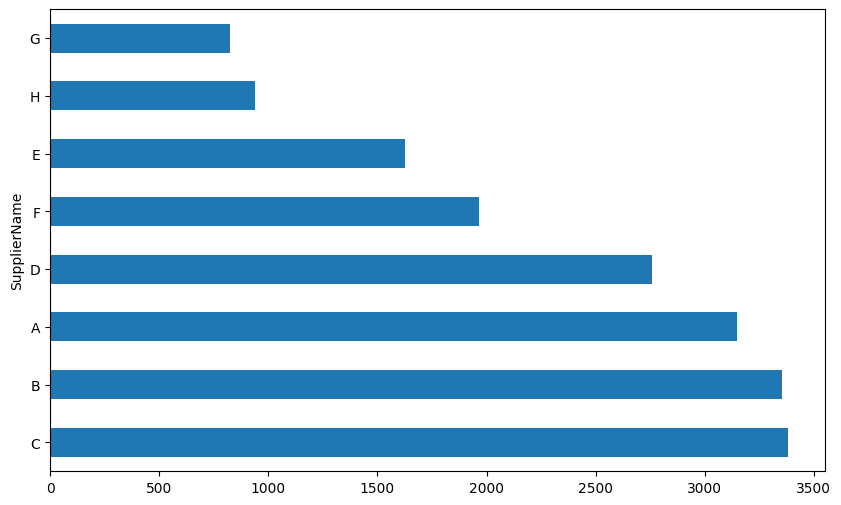

In [15]:
historical_indicents["SupplierName"].value_counts().plot(kind='barh', figsize=(10, 6))

<Axes: ylabel='IssueDescription'>

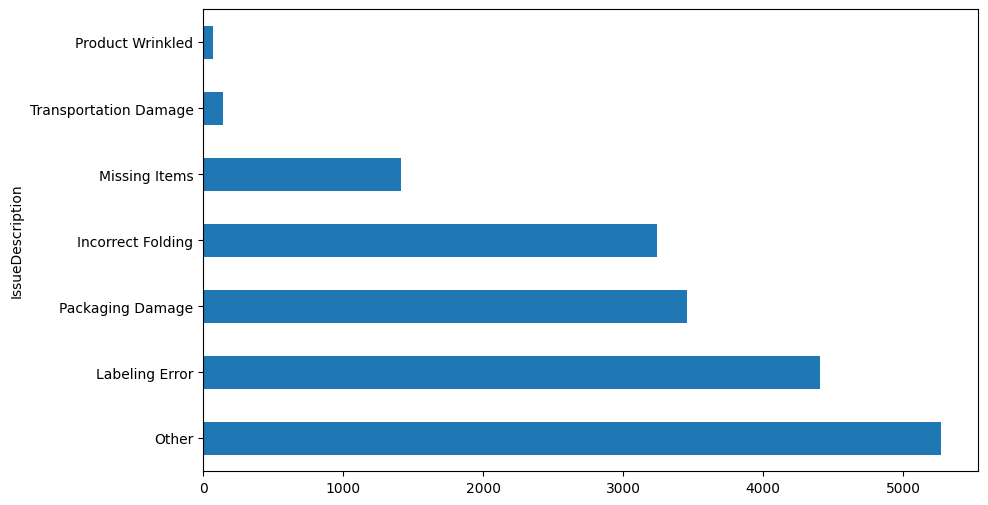

In [16]:
historical_indicents['IssueDescription'].value_counts().plot(kind='barh', figsize=(10, 6))

<Axes: ylabel='ResolutionStatus'>

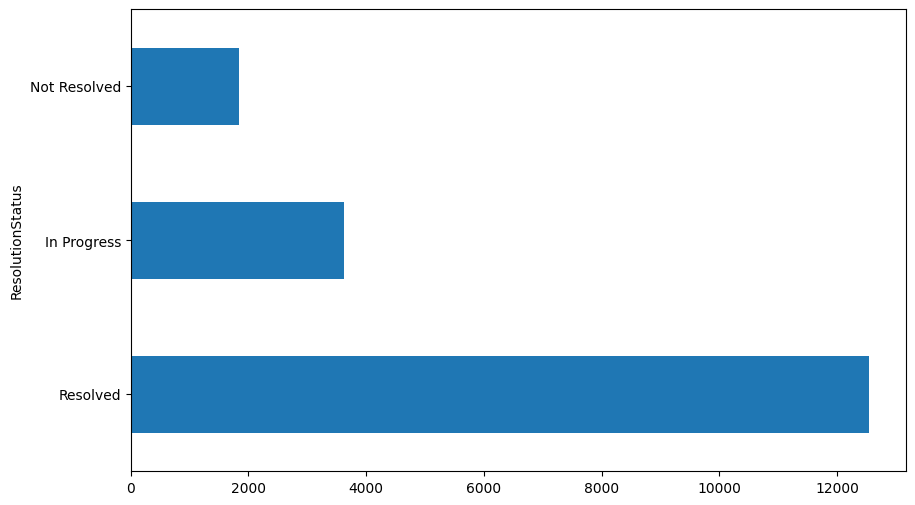

In [17]:
historical_indicents['ResolutionStatus'].value_counts().plot(kind='barh', figsize=(10, 6))

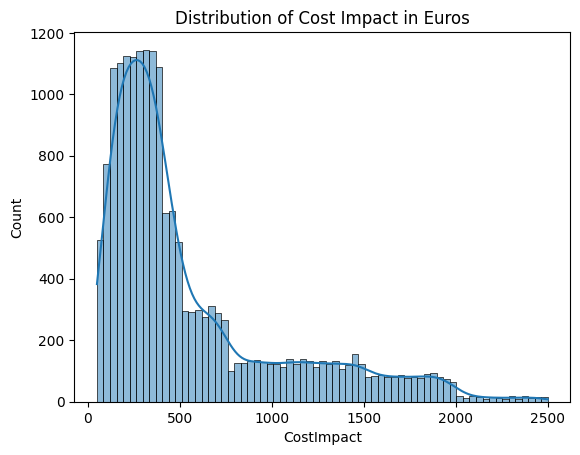

In [21]:
sns.histplot(historical_indicents['CostImpact'], kde=True)
plt.title('Distribution of Cost Impact in Euros')
plt.show()

## Bivariate Analysis

### Values Across Time

##### Total Counts over Time

<Axes: xlabel='Month'>

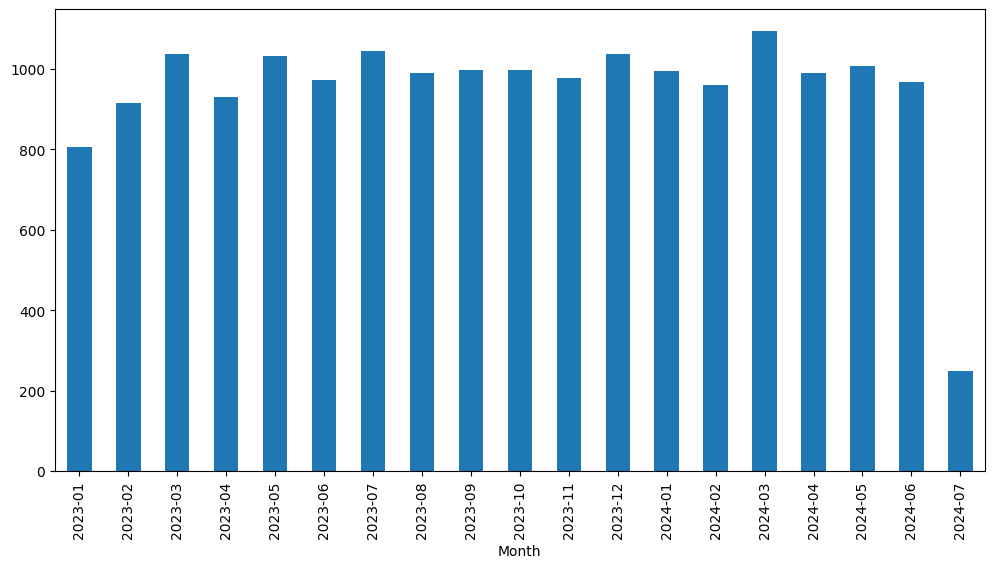

In [23]:
historical_indicents['Month'] = historical_indicents['DateOfIncident'].dt.to_period('M')
monthly_counts = historical_indicents.groupby('Month').size()
monthly_counts.plot(kind='bar', figsize=(12, 6))

##### Monthly Supplier Distribution

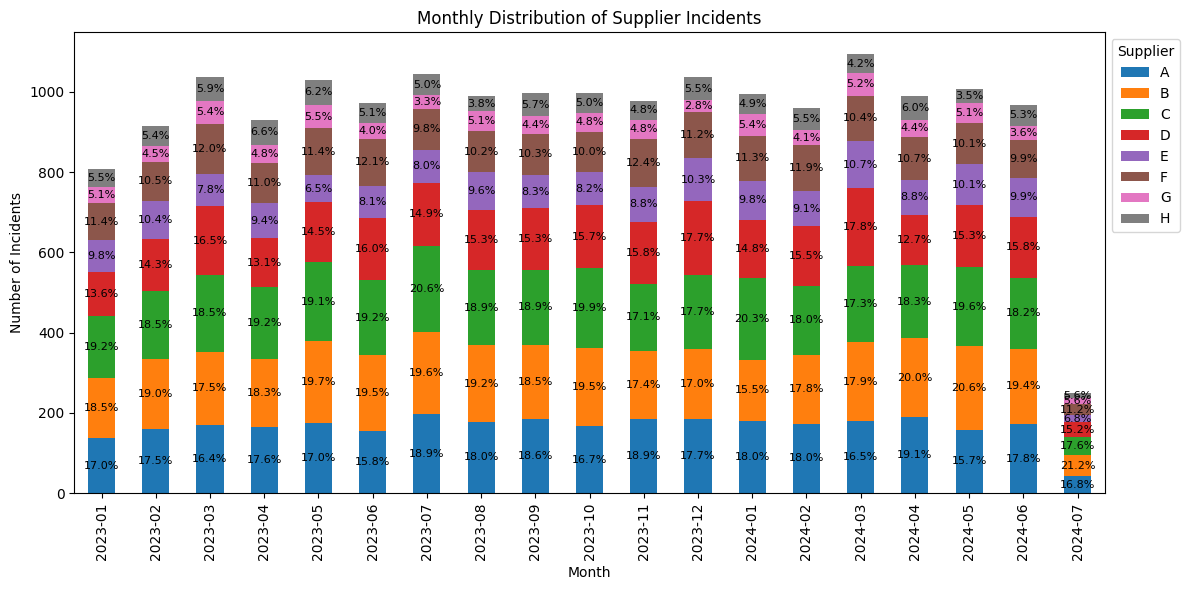

In [34]:
# Group by Month and SupplierName, calculate counts
monthly_supplier_counts = historical_indicents.groupby(['Month', 'SupplierName']).size().unstack(fill_value=0)

# Plot the distribution
ax = monthly_supplier_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Distribution of Supplier Incidents')
plt.ylabel('Number of Incidents')
plt.xlabel('Month')

# Add percentage labels
for idx, month in enumerate(monthly_supplier_counts.index):
    total = monthly_supplier_counts.loc[month].sum()
    y_offset = 0
    for supplier in monthly_supplier_counts.columns:
        count = monthly_supplier_counts.loc[month, supplier]
        if count > 0:
            percent = count / total * 100
            ax.text(idx, y_offset + count / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=8, color='black')
            y_offset += count

plt.legend(title='Supplier', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Monthly Distribution of Issue Description

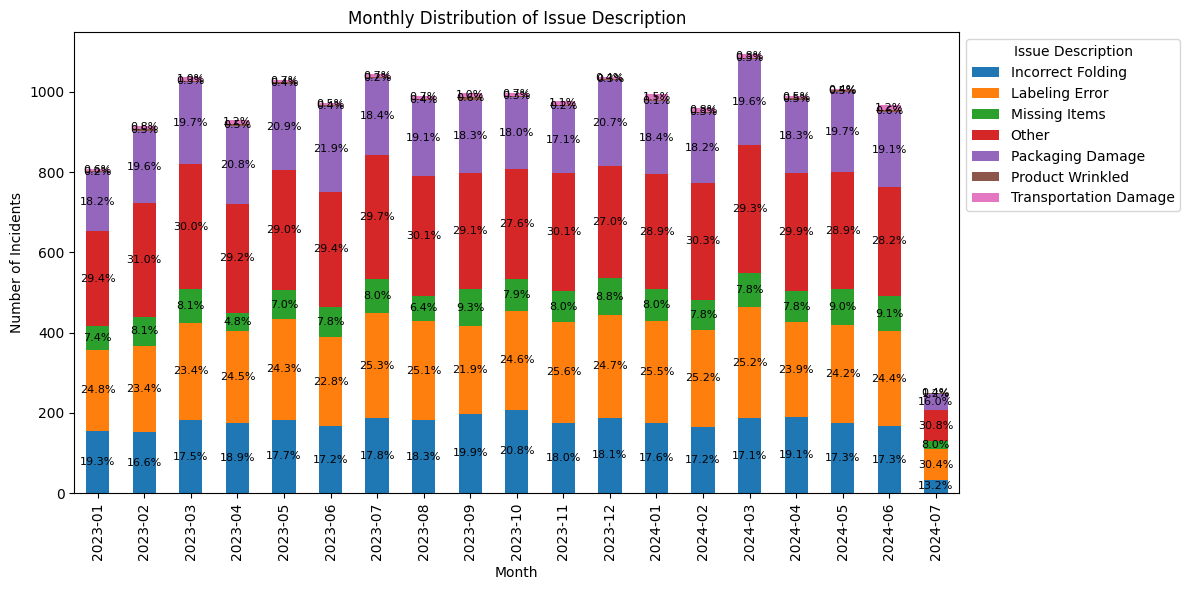

In [35]:
# Group by Month and IssueDescription, calculate counts
monthly_issue_counts = historical_indicents.groupby(['Month', 'IssueDescription']).size().unstack(fill_value=0)

# Plot the distribution
ax = monthly_issue_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Distribution of Issue Description')
plt.ylabel('Number of Incidents')
plt.xlabel('Month')

# Add percentage labels
for idx, month in enumerate(monthly_issue_counts.index):
    total = monthly_issue_counts.loc[month].sum()
    y_offset = 0
    for issue in monthly_issue_counts.columns:
        count = monthly_issue_counts.loc[month, issue]
        if count > 0:
            percent = count / total * 100
            ax.text(idx, y_offset + count / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=8, color='black')
            y_offset += count

plt.legend(title='Issue Description', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Monthly Distribution of Resolution Status

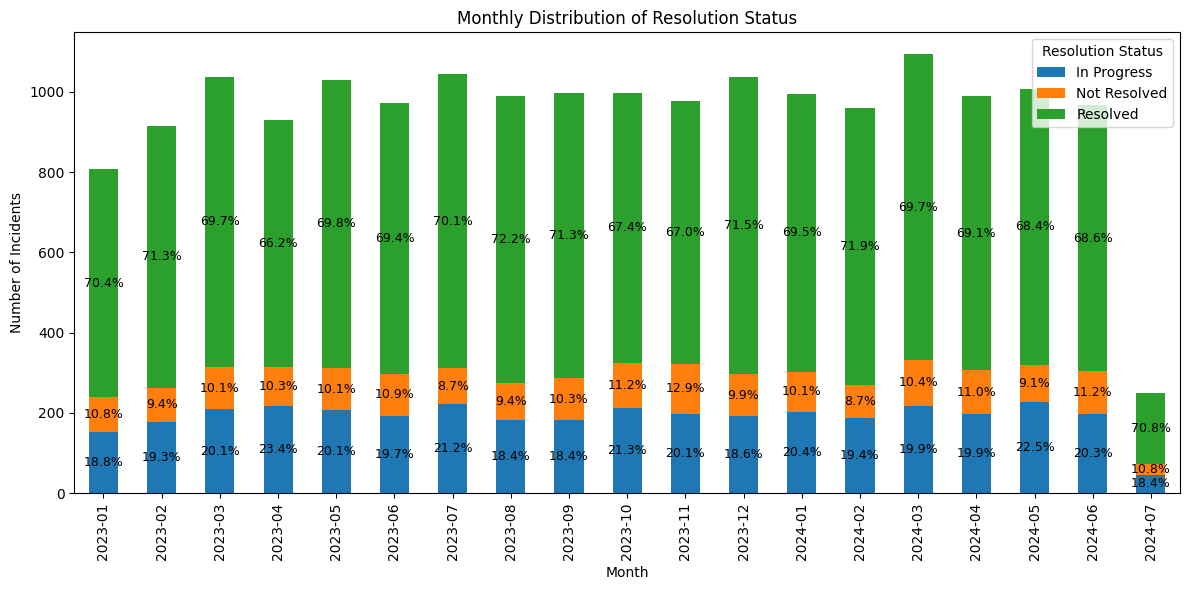

In [36]:
# Group by Month and ResolutionStatus, calculate counts
monthly_status_counts = historical_indicents.groupby(['Month', 'ResolutionStatus']).size().unstack(fill_value=0)

# Plot the distribution
ax = monthly_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Distribution of Resolution Status')
plt.ylabel('Number of Incidents')
plt.xlabel('Month')

# Add percentage labels
for idx, month in enumerate(monthly_status_counts.index):
    total = monthly_status_counts.loc[month].sum()
    y_offset = 0
    for status in monthly_status_counts.columns:
        count = monthly_status_counts.loc[month, status]
        if count > 0:
            percent = count / total * 100
            ax.text(idx, y_offset + count / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=9, color='black')
            y_offset += count

plt.legend(title='Resolution Status')
plt.tight_layout()
plt.show()

##### Monthly Cost Impact

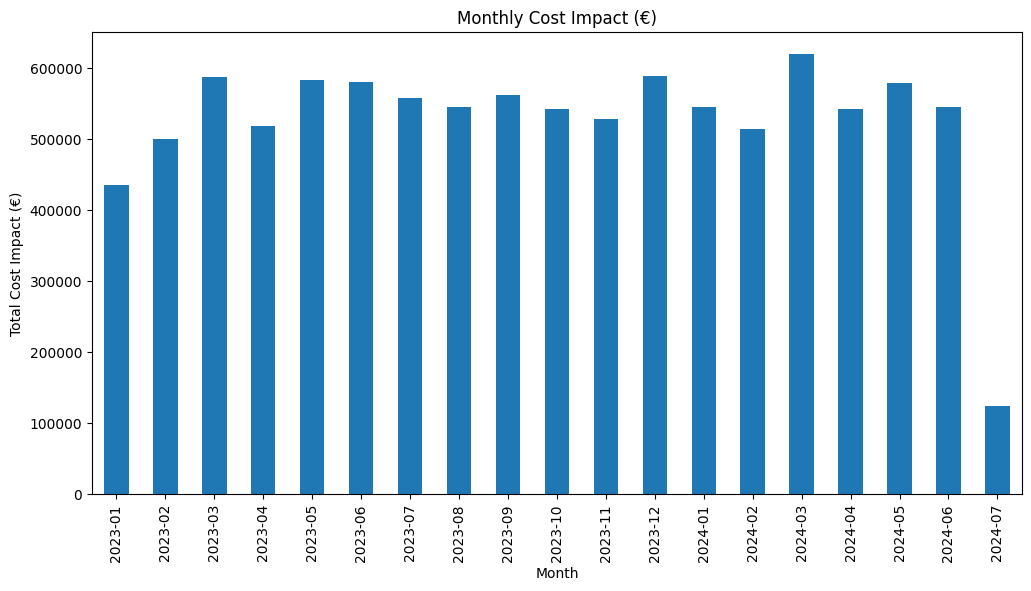

In [25]:
monthly_cost_impact = historical_indicents.groupby('Month')['CostImpact'].sum()
monthly_cost_impact.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Cost Impact (€)')
plt.ylabel('Total Cost Impact (€)')
plt.xlabel('Month')
plt.show()

### Values Across Suppliers

##### Total Counts over Supplier

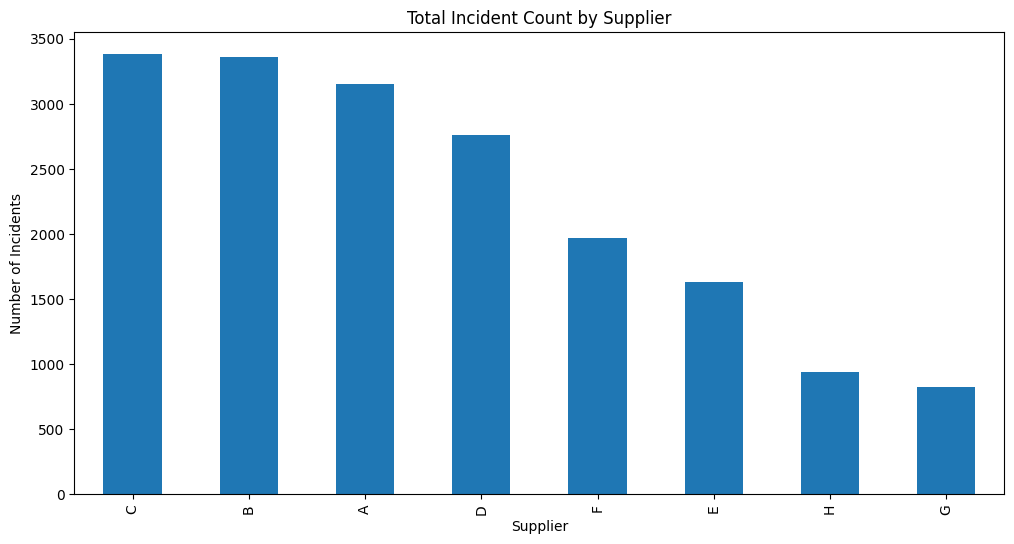

In [40]:
historical_indicents['SupplierName'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Total Incident Count by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Number of Incidents')
plt.show()

##### Supplier Issue Description Distribution

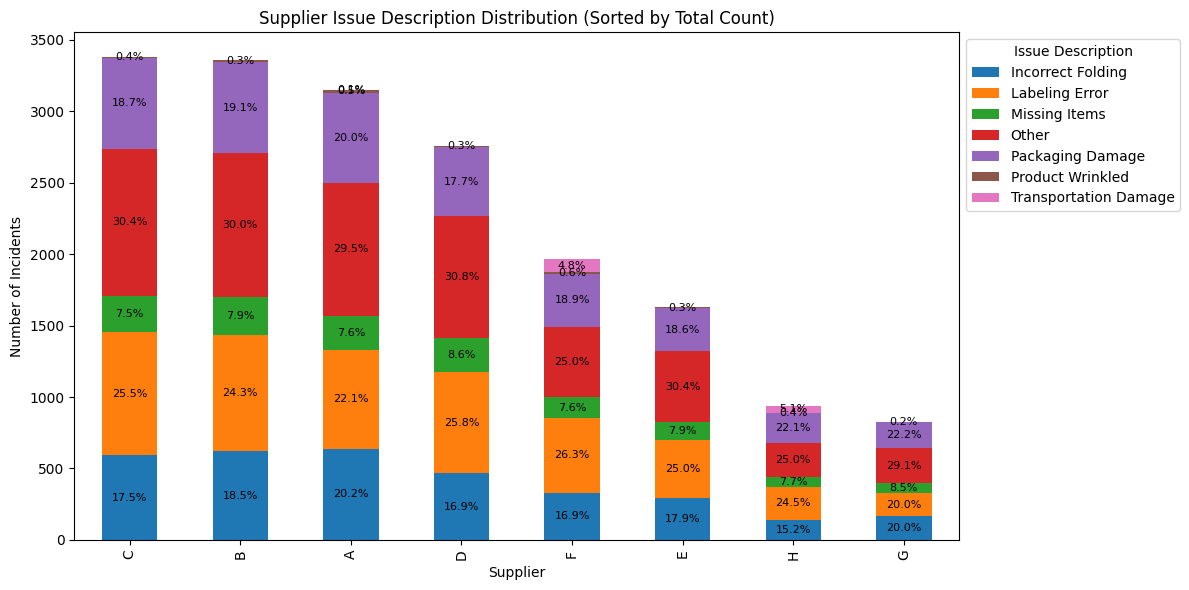

In [43]:
# Group by SupplierName and IssueDescription, calculate counts
supplier_issue_counts = historical_indicents.groupby(['SupplierName', 'IssueDescription']).size().unstack(fill_value=0)

# Sort suppliers by total incident count (descending)
supplier_totals = supplier_issue_counts.sum(axis=1).sort_values(ascending=False)
supplier_issue_counts = supplier_issue_counts.loc[supplier_totals.index]

# Plot the distribution
ax = supplier_issue_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Supplier Issue Description Distribution (Sorted by Total Count)')
plt.ylabel('Number of Incidents')
plt.xlabel('Supplier')

# Add percentage labels
for idx, supplier in enumerate(supplier_issue_counts.index):
    total = supplier_issue_counts.loc[supplier].sum()
    y_offset = 0
    for issue in supplier_issue_counts.columns:
        count = supplier_issue_counts.loc[supplier, issue]
        if count > 0:
            percent = count / total * 100
            ax.text(idx, y_offset + count / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=8, color='black')
            y_offset += count

plt.legend(title='Issue Description', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Supplier Resolution Status Distribution

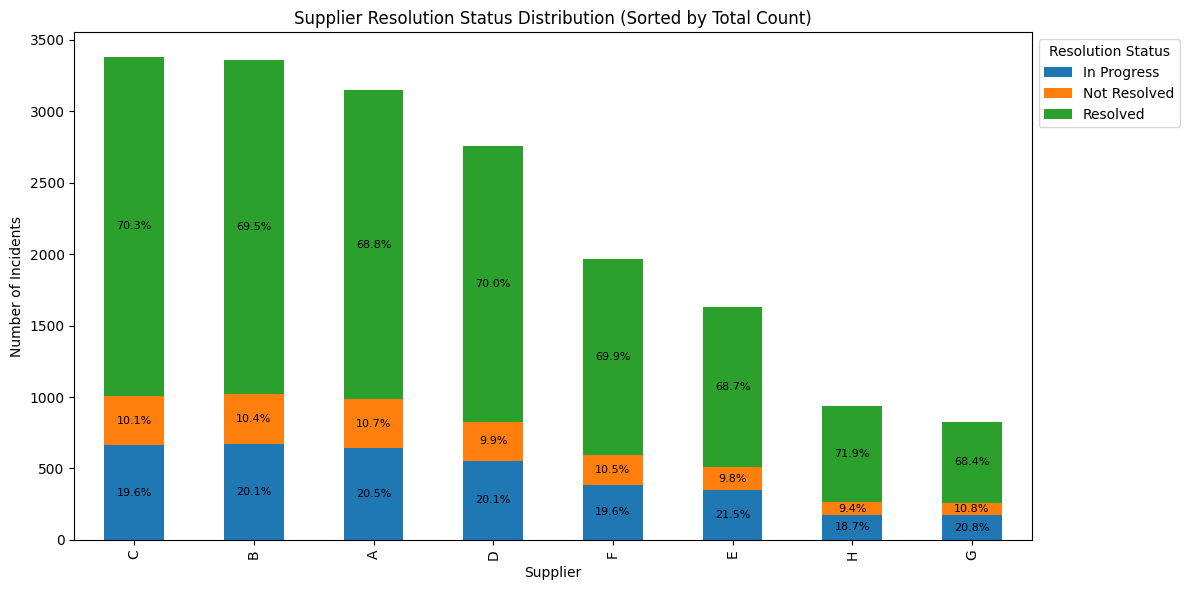

In [45]:
# Group by SupplierName and ResolutionStatus, calculate counts
supplier_status_counts = historical_indicents.groupby(['SupplierName', 'ResolutionStatus']).size().unstack(fill_value=0)

# Sort suppliers by total incident count (descending)
supplier_totals_status = supplier_status_counts.sum(axis=1).sort_values(ascending=False)
supplier_status_counts = supplier_status_counts.loc[supplier_totals_status.index]

# Plot the distribution
ax = supplier_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Supplier Resolution Status Distribution (Sorted by Total Count)')
plt.ylabel('Number of Incidents')
plt.xlabel('Supplier')

# Add percentage labels
for idx, supplier in enumerate(supplier_status_counts.index):
    total = supplier_status_counts.loc[supplier].sum()
    y_offset = 0
    for status in supplier_status_counts.columns:
        count = supplier_status_counts.loc[supplier, status]
        if count > 0:
            percent = count / total * 100
            ax.text(idx, y_offset + count / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=8, color='black')
            y_offset += count

plt.legend(title='Resolution Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

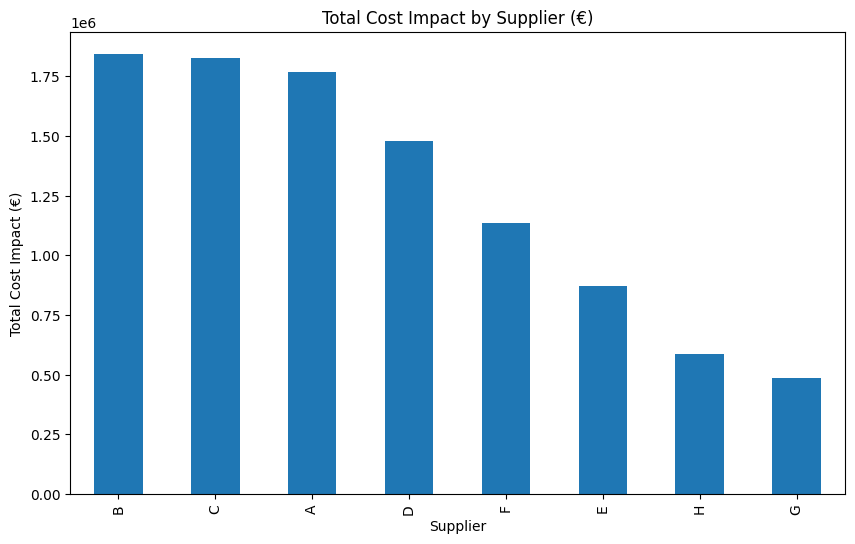

In [46]:
# Calculate total cost impact per supplier
supplier_cost_impact = historical_indicents.groupby('SupplierName')['CostImpact'].sum().sort_values(ascending=False)

# Plot
supplier_cost_impact.plot(kind='bar', figsize=(10, 6))
plt.title('Total Cost Impact by Supplier (€)')
plt.xlabel('Supplier')
plt.ylabel('Total Cost Impact (€)')
plt.show()